In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class brownian_bridge:
    def __init__(self, T:float,S0:float = 0, ST:float = 0) -> None:
        self.T = T
        self.value = S0
        self.history = [self.value]
        self.history_t = [0]
        
        self.S0 = S0
        self.ST = ST

    def update_value(self, new_value:float, dt:float):
        self.history.append(new_value)
        last_t = self.history_t[-1]
        self.history_t.append(last_t + dt)
        self.value = new_value
        return None
    
    def advance(self, dt:float):
        ST = self.ST
        S0 = self.S0

        Y_t = self.value
        dW = np.random.normal(0,np.sqrt(dt))

        T = self.T
        t = self.history_t[-1]

        dY = -((Y_t-S0)/(T-t))*dt  + dW  

        
        
        
        #desired drift
        dY = dY + ((ST-S0)/(T-t))*dt
        
        new_value = Y_t + dY
        #new_value = dY
        self.update_value(new_value, dt)
    

8.004501848142656

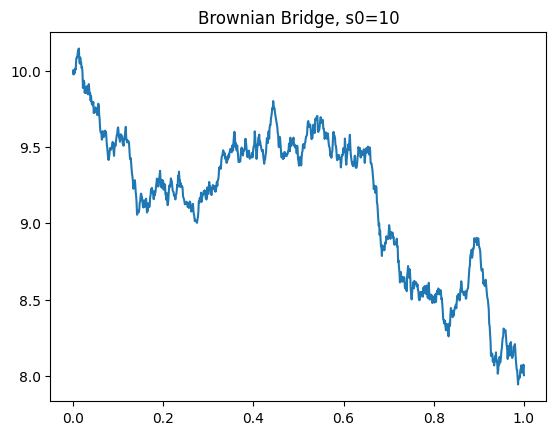

In [3]:
horizon = 1
N = 1000
dt = horizon/N

s0 = 10

bb = brownian_bridge(T=horizon, S0=s0, ST=s0-2)

for i in range(N):
    bb.advance(dt)

plt.plot(np.array(bb.history_t), np.array(bb.history))
plt.title('Brownian Bridge, s0={}'.format(s0))
bb.history[-1]
